In [11]:
import os
import yaml
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

'c:\\Users\\nosni\\Desktop\\projects\\disc_golf_graphs'

In [17]:
brands_yml = r'..\brands\brands.yml'
brands = yaml.load(open(brands_yml), Loader=yaml.FullLoader)
brands

[{'company': 'MVP', 'brands': [{'brand': 'Axiom'}, {'brand': 'Streamline'}]},
 {'company': 'Lone Star',
  'brands': [{'brand': 'Sacred'}, {'brand': 'Hooligan'}]},
 {'company': 'Gateway',
  'brands': [{'brand': 'Above Ground Level'}, {'brand': 'Black Zombie'}]},
 {'company': 'Innova'},
 {'company': 'Discraft'},
 {'company': 'House of Discs',
  'brands': [{'brand': 'Latitude 64'},
   {'brand': 'Kastaplast'},
   {'brand': 'Discmania'},
   {'brand': 'Westside'},
   {'brand': 'Dynamic Discs'}]},
 {'company': 'Prodigy'},
 {'company': 'Mint', 'manufacturer': 'MVP'},
 {'company': 'Thought Space Athletics', 'manufacturer': 'MVP'},
 {'company': 'Wild Discs', 'manufacturer': 'MVP'},
 {'company': 'Jester', 'manufacturer': 'MVP'},
 {'company': 'DGA', 'manufacturer': 'Discraft'},
 {'company': 'Millenium',
  'manufacturer': 'Innova',
  'brands': [{'brand': 'Hyzerbomb'}]},
 {'company': 'Infinite', 'manufacturer': 'Innova'}]

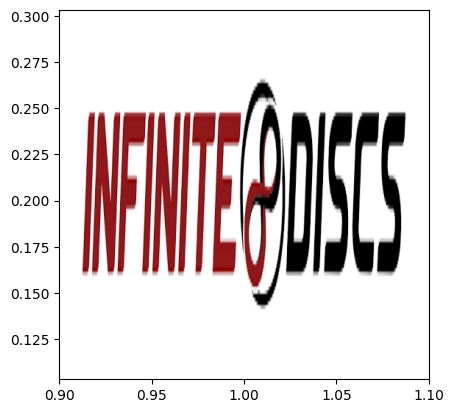

In [33]:
# Create a new graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for company_data in brands:
    company_name = company_data["company"]
    G.add_node(company_name)
    if 'brands' in company_data:
        for brand in company_data["brands"]:
            brand_name = brand["brand"]
            G.add_node(brand_name)
            G.add_edge(company_name, brand_name)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)  # Layout the graph using the spring layout algorithm

# Draw the nodes and edges
for node in G.nodes:
    img = mpimg.imread(os.path.join('..', 'brands', 'logos', node + '.png'))
    plt.imshow(img, extent=(pos[node][0] - 0.1, pos[node][0] + 0.1, pos[node][1] - 0.1, pos[node][1] + 0.1))
# for edge in G.edges:
#     if G.edges[edge]["manufacturer"] != edge[0]:
#         plt.annotate("", xy=pos[edge[1]], xytext=pos[edge[0]], arrowprops=dict(arrowstyle="->"))

# Display the plot
plt.show()


